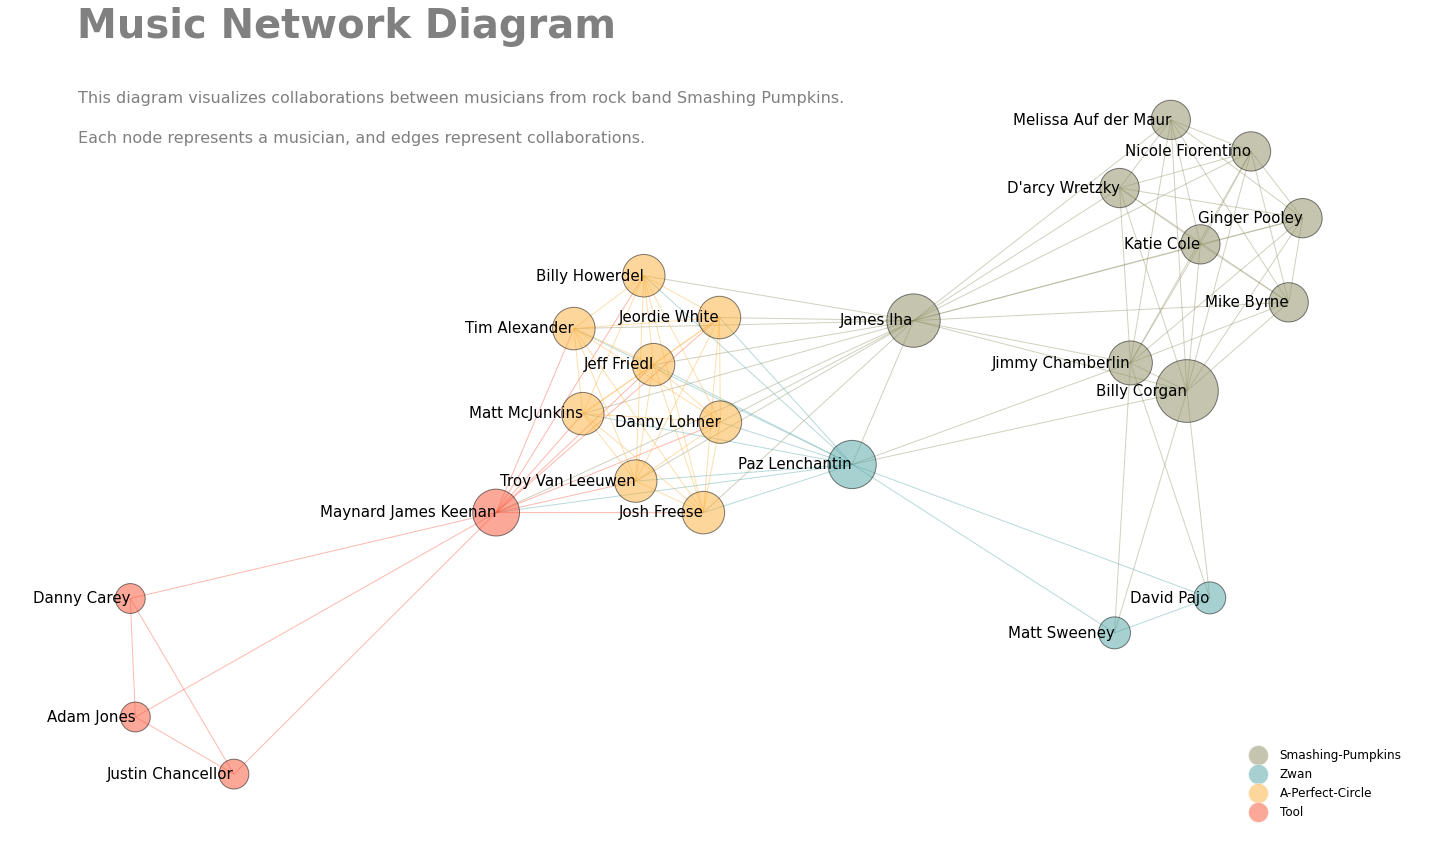

In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create a graph
G = nx.Graph()

# Define each band
smashing_pumpkins = ['Billy Corgan', 'James Iha', 'Jimmy Chamberlin', 'Katie Cole', "D'arcy Wretzky",
                     'Melissa Auf der Maur', 'Ginger Pooley', 'Mike Byrne', 'Nicole Fiorentino']
zwan = ['Billy Corgan', 'Jimmy Chamberlin', 'Paz Lenchantin', 'David Pajo', 'Matt Sweeney']
tool = ["Maynard James Keenan", "Adam Jones", "Danny Carey", "Justin Chancellor"]
a_perfect_circle = ["Maynard James Keenan", "Billy Howerdel", "James Iha", "Matt McJunkins", "Jeff Friedl",
                    "Troy Van Leeuwen", "Paz Lenchantin", "Tim Alexander", "Josh Freese", "Danny Lohner",
                    "Jeordie White"]

# Combine the bands into communities
communities = [smashing_pumpkins, zwan, tool, a_perfect_circle]

# Add nodes and edges to the graph
for community in communities:
    G.add_nodes_from(community)
    G.add_edges_from([(node1, node2, {'weight': 1}) for node1 in community for node2 in community if node1 != node2])

# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create dataframes for centrality measures
bc_data = pd.DataFrame.from_dict(betweenness_centrality, columns=["BetweennessCentrality"], orient="index")
dc_data = pd.DataFrame.from_dict(degree_centrality, columns=["DegreeCentrality"], orient="index")
cc_data = pd.DataFrame.from_dict(closeness_centrality, columns=["ClosenessCentrality"], orient="index")
centrality_data = pd.concat([bc_data, dc_data, cc_data], axis=1)

# Define custom color palette
color_palette = {
    'Smashing-Pumpkins': '#8d8d61','Zwan': '#50a3a4','A-Perfect-Circle': '#fcaf38','Tool': '#f95335',
}

# Define node colors
node_colors = [color_palette['Smashing-Pumpkins'] if node in smashing_pumpkins
               else color_palette['Zwan'] if node in zwan
               else color_palette['Tool'] if node in tool
               else color_palette['A-Perfect-Circle'] for node in G.nodes]

# Define node sizes based on degree centrality
node_sizes = [(dc_data.loc[node, 'DegreeCentrality'] * 3000 + 500) if node != 'Billy Corgan' 
              else (dc_data.loc[node, 'DegreeCentrality'] * 3000 + 500) + 2000 for node in G.nodes]

# Set figure size
plt.figure(figsize=(20, 12))

# Calculate node positions using the spring layout
pos = nx.spring_layout(G, seed=30)

# Define edge colors based on node colors
edge_colors = [(color_palette['Smashing-Pumpkins'] if node1 in smashing_pumpkins else
                color_palette['Zwan'] if node1 in zwan else
                color_palette['Tool'] if node1 in tool else
                color_palette['A-Perfect-Circle']) for node1, node2 in G.edges()]

# Draw nodes with adjusted sizes and colors
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.5, edgecolors='k', linewidths=1)

# Draw edges with varying thickness based on number of collaborations
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_weights, alpha=0.4)

# Draw node labels with adjusted positions
nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', verticalalignment='center', horizontalalignment='right')

# Create legend dynamically with adjusted transparency
legend_labels = []
legend_colors = []
for band, color in color_palette.items():
    if band in ['Smashing-Pumpkins', 'Zwan', 'Tool', 'A-Perfect-Circle']:
        legend_labels.append(band)
        legend_colors.append(color)

# Set alpha for legend markers
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20, alpha=0.5) for color in
                  legend_colors]

# Create legend
plt.legend(legend_markers, legend_labels, loc='lower right', fontsize='large', frameon=False, borderpad=1,
           borderaxespad=1)

# Set title and subtitle aligned to the left
plt.suptitle('Music Network Diagram', fontsize=40, fontweight='bold', color='grey', x=0.056, horizontalalignment='left')

# Add explanation text
plt.text(0.05, 0.95, 'This diagram visualizes collaborations between musicians from rock band Smashing Pumpkins.', 
         fontsize=16, color='grey', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, 'Each node represents a musician, and edges represent collaborations.', 
         fontsize=16, color='grey', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

# Hide axis
plt.axis('off')

# Set background color
plt.gca().set_facecolor('lightgray')

# Improve spacing
plt.tight_layout()

# Show graph
plt.show()